# Lab 1
# James Thomas, Xiaoxian Jing, Kuang Yan
## Option 1: Table Data

 1. [Business Understanding](#business_understanding)<br>
 2. [Data Understanding](#data_understanding)<br>
  2.1 [Load Dataset and Define Data Types](#load_dataset)<br>
  2.2 [Verify Data Quality](#verify_quality)<br>
 3. [Data Visualizations](#data_visualization)<br>
  3.1 [Visualize Attribute Distributions](#attribute_distributions)<br>
  ...3.1.1 [Visualize Age](#age)<br>
  ...3.1.2 [Visualize Race](#race)<br>
  ...3.1.3 [Visualize Gender](#gender)<br>
  ...3.1.4 [Visualize the Number of Procedures Completed](#procedures)<br>
  ...3.1.5 [Visualize the Number of Medications](#medications)<br>
  3.2 [Visualize Relationships Between Attributes](#visualize_relationships)<br>
  ...3.2.1 [Violin Plot](#violin)<br>
  ...3.2.2 [Correlation Plot](#correlation)<br>
  ...3.2.3 [Pairwise Distance](#pairwise)<br>
 4. [Exceptional Work](#exceptional_work")<br>
  4.1 [Dimensionality Reduction](#dim_reduction)<br>
  ...5.1.1[t-SNE](#tsne)<br>
  ...5.1.2[PCA](#pca)<br>
  4.2 [Playing with Scikit-Learn](#scikit_learn)<br>
 5. [Final Thoughts](#thoughts)<br>
  
[//]: # (Is this really the best way to comment)
[//]: # (note the <br>, and why do I need .. for 3rd level?, maybe I should just use pureish html)

# Business Understanding
<a id="business_understanding"></a>

For lab 1, we chose to use a [data set](https://toolbox.google.com/datasetsearch/search?query=diabetes&docid=nNaPT3seeZMO6VmgAAAAAA%3D%3D) regarding hospital admissions for patients with diabetes. The data was originally collected from 130 US hospitals from 1999 to 2008. Each visit met the following criteria

1. it is a hospital admission
2. it is a diabetic encounter (one where diabetes was entered into the system as a diagnosis)
3. the length of the stay was between 1 and 14 days
4. lab tests were performed during the encounter
5. medications were administered during the encounter

There were multiple objectives when the data was collected. One is help under situations where the patined will not be readmitted. If the patient is likely be readmitted, perhaps the treatment regime can be modified to prevent the readmission. With this in mind, the initial task will be to predict whether the patient will be readmittied in less than 30 days, readmitted in more than 30 days, or not readmitted at all. [Previous studies](https://pdfs.semanticscholar.org/1e11/7852d33574376328b17826d746702be85748.pdf) using this dataset have achieved prediction accuracies of around 50% depending on the algorithm used. Therefore, anything better than 50% is likely to be useful.

# Data Understanding
<a id="data_understanding"></a>

## Load the dataset and define data types
<a id="load_dataset"></a>

In [64]:
# load the full dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
plt.style.use('ggplot')
%matplotlib inline
warnings.simplefilter('ignore')

full_df = pd.read_csv('data/diabetic_data.csv')

full_df.head()
#print('the size of the dataframe is ',full_df.size)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


As can be seen above, this dataset contains 50 different attributes. 

1. encounter_id. This is simply an identifier. This is a __nominal__ attribute and likely won't be useful for predictions.
2. patinnt_nbr. This is also an idtentifier. This is also a __nominal__ attribute. It may be useful for predictions in the sense that a patient who was in the hospital frequently is likely to return to the hospital again.
3. race. This is also __nominal__ attribute. I am not sure about diabetes, but I think some diseases, such as [sycle cell anemia](https://www.nhlbi.nih.gov/health-topics/sickle-cell-disease), are more likely in certain races than others.
4. gender. This is also a __nominal__ attribute. Once again, I am not sure about diabetes specifically, but this may be useful for predictions.
5. age. This is an __interval__ attribute. This is likely to be useful for predictions because older people may be more likely to need frequent hospital visits.
6. weight. This is __??__ attribute. This is likely to be useful for predictions because it is linked to body mass index, and people with too high or too low of BMIs are likely to be generally unhealthy and need frequent hospital visits.
7. admission_type_id. This is also an id and is a __nominal__ attribute. This is likely to be useful for predictions because it contains information about why the patient is there in the first place.
8. discharge_disposition_id. This is also an id and is a __nominal__ attribute. This is likely to be useful for predictions because it contains information about what happeed to the patient after they were discharged.
9. admission_source_id. This is an id and is a __nominal__ attribute. This is likely to be useful for predictions because it contains information where the persion was admittied at. A person admitted at an emergency room may have different outcomes than someone who was admitted electively.
10. time in hospital. This is an __ordinal__ attribute. This is likely to be useful for predictions.
11. Skip several ....
12. There are many different types of medicines listed in the data set. These are __nominal__ attributes. These are likely to be useful for predictions because certain medicines may be indiciative of long-term health problems. We may also be able to combine many of these medicines into a single attribute in the future, but we will have to look into that.
13. Finally, readmitted. This is an __ordinal__ attribute and is what we intend to predict.

## Verify data quality
<a id="verify_quality"></a>

In [2]:
# have a quick look at the data, each one in its own cell so jupyter can render into pretty html instead of pythons native print

full_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [3]:
full_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
# find the percentage of patients readmitted within the time frames
# ultimately what we want to predict

print('percentage of people not readmitted is {:.2f}%'.format(sum(full_df.readmitted != 'NO')/len(full_df)*100))
print('percentage of people readmitted in less than 30 days is {:.2f}%'.format(sum(full_df.readmitted == '<30')/len(full_df)*100))
print('percentage of people readmitted in more than 30 days is {:.2f}%'.format(sum(full_df.readmitted == '>30')/len(full_df)*100))

percentage of people not readmitted is 46.09%
percentage of people readmitted in less than 30 days is 11.16%
percentage of people readmitted in more than 30 days is 34.93%


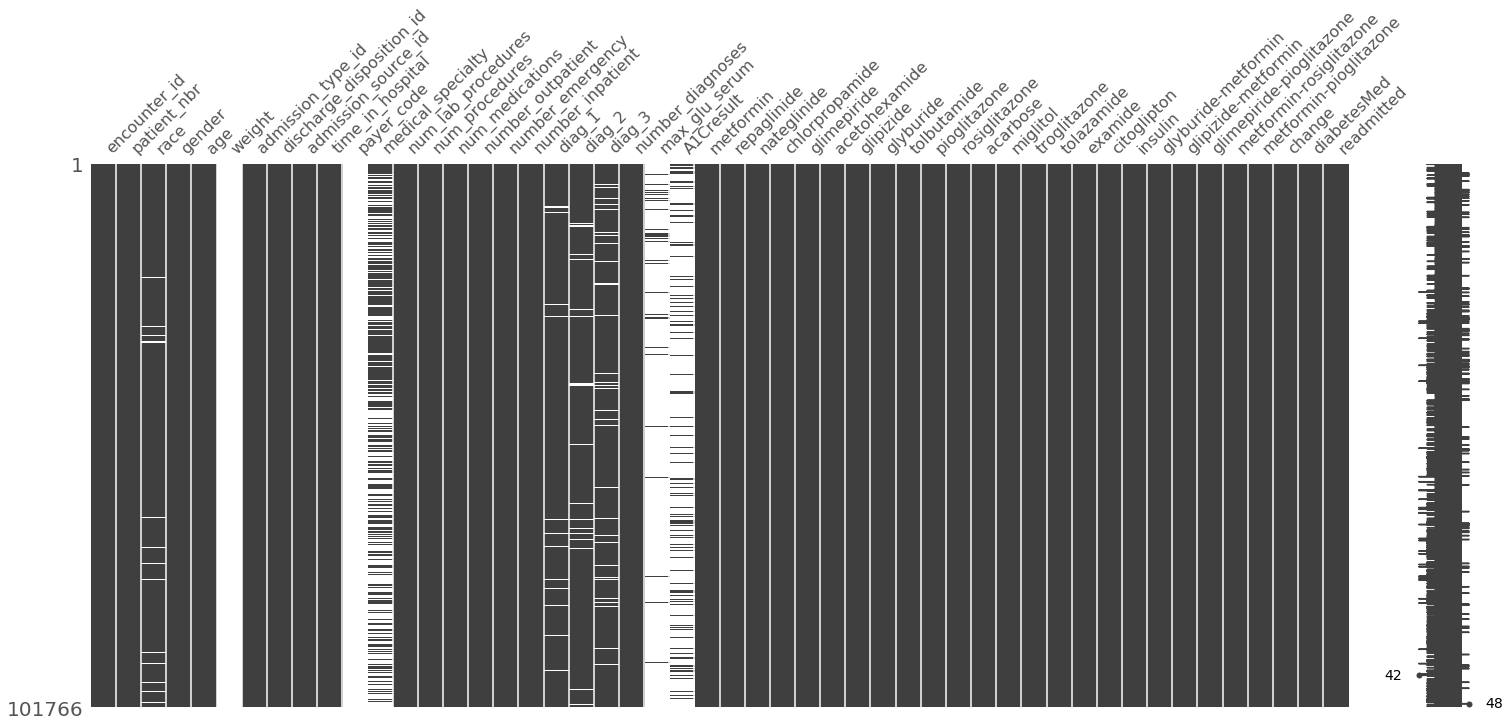

In [6]:
# now we can start looking at the data a little closer
%matplotlib inline
import os
if os.getcwd().find('jamesthomas'):
    import sys
    sys.path.append('/users/jamesthomas/python_packages/')
    import missingno as mn

# first force the columns that should be numeric to numeric
numeric_cols = ['weight','payer_code','diag_1','diag_2','diag_3']
full_df[numeric_cols]=full_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# now replace the '?' in the string data
full_df.replace({'?':None,'None':None}, inplace = True)
mn.matrix(full_df)

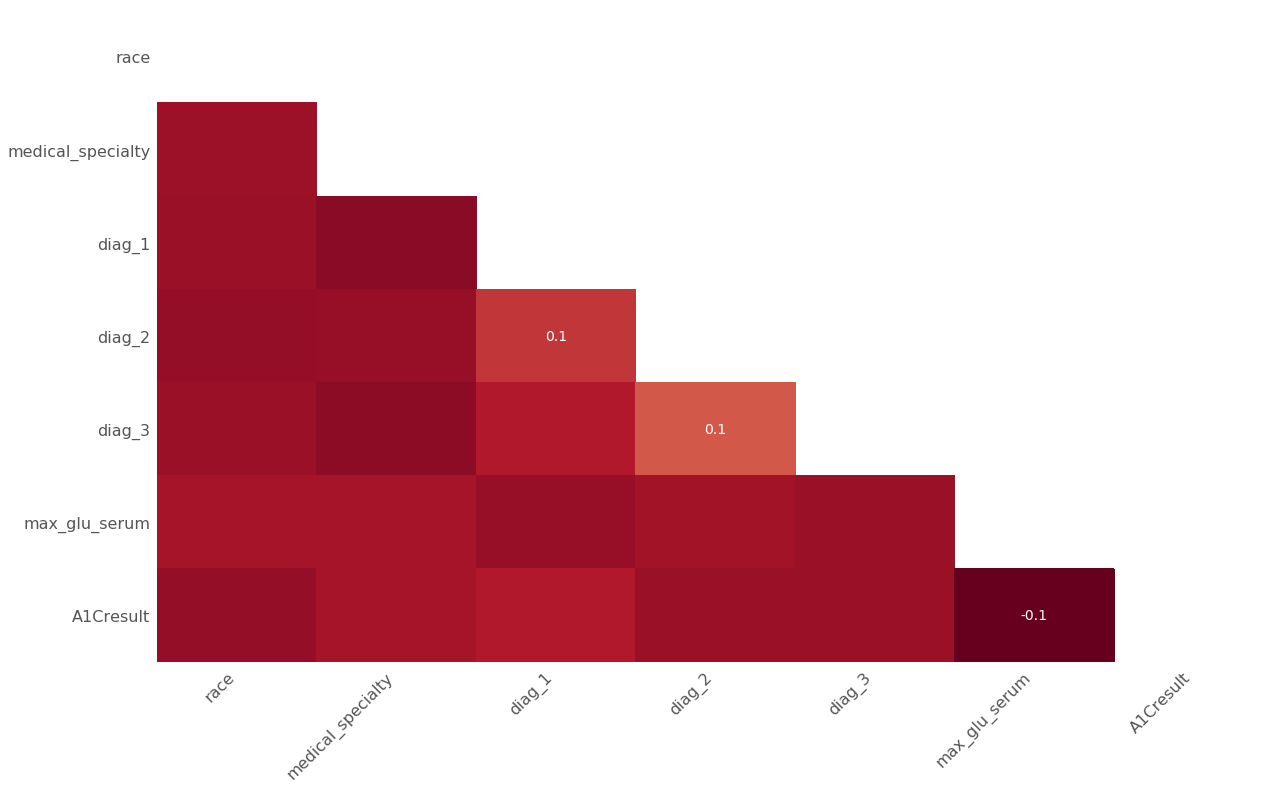

In [7]:
mn.heatmap(full_df)

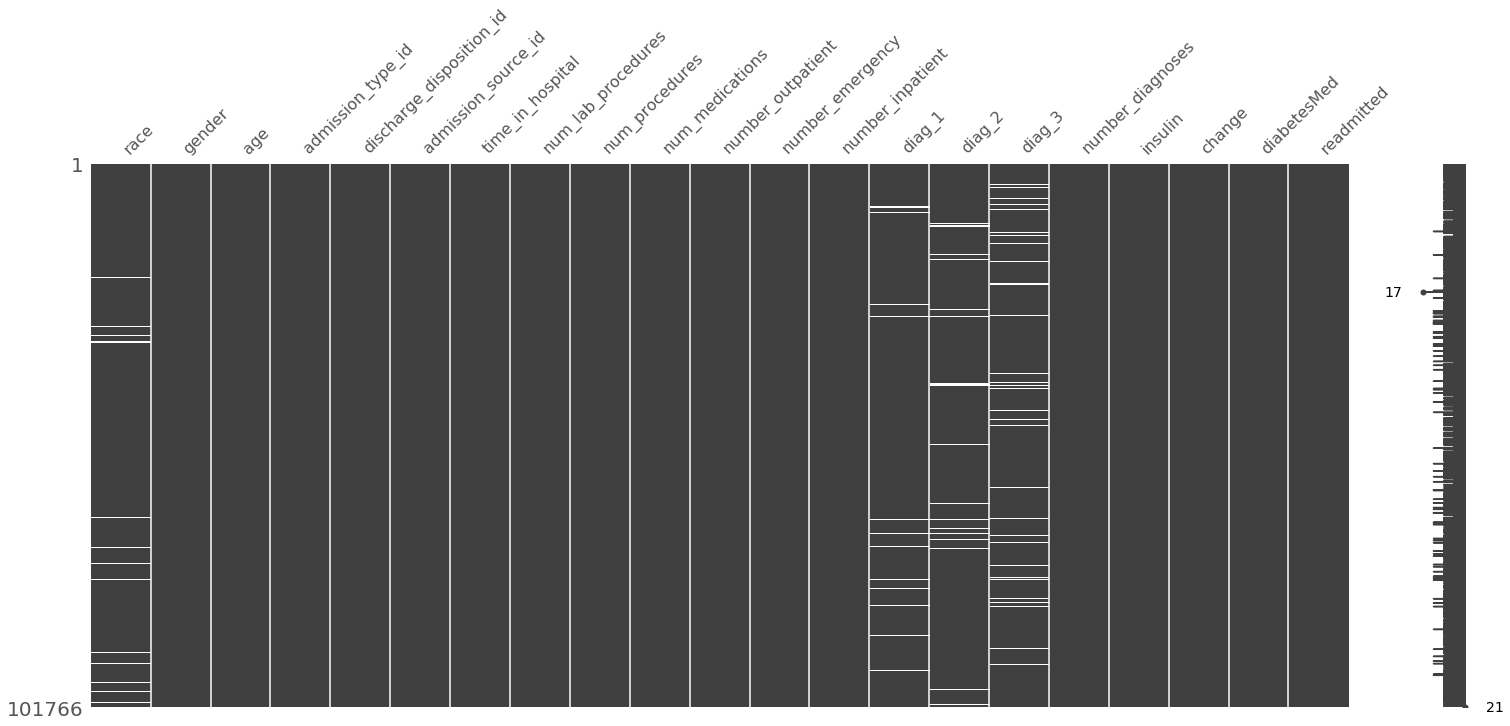

In [8]:
cols_to_drop_obvious = ['encounter_id', 'patient_nbr']
cols_to_drop_missing = ['weight','payer_code','medical_specialty','max_glu_serum','A1Cresult']
meds = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
                    'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
                    'tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin',
                    'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

sub_df = full_df.drop(cols_to_drop_obvious+cols_to_drop_missing+meds, axis = 1)
mn.matrix(sub_df)

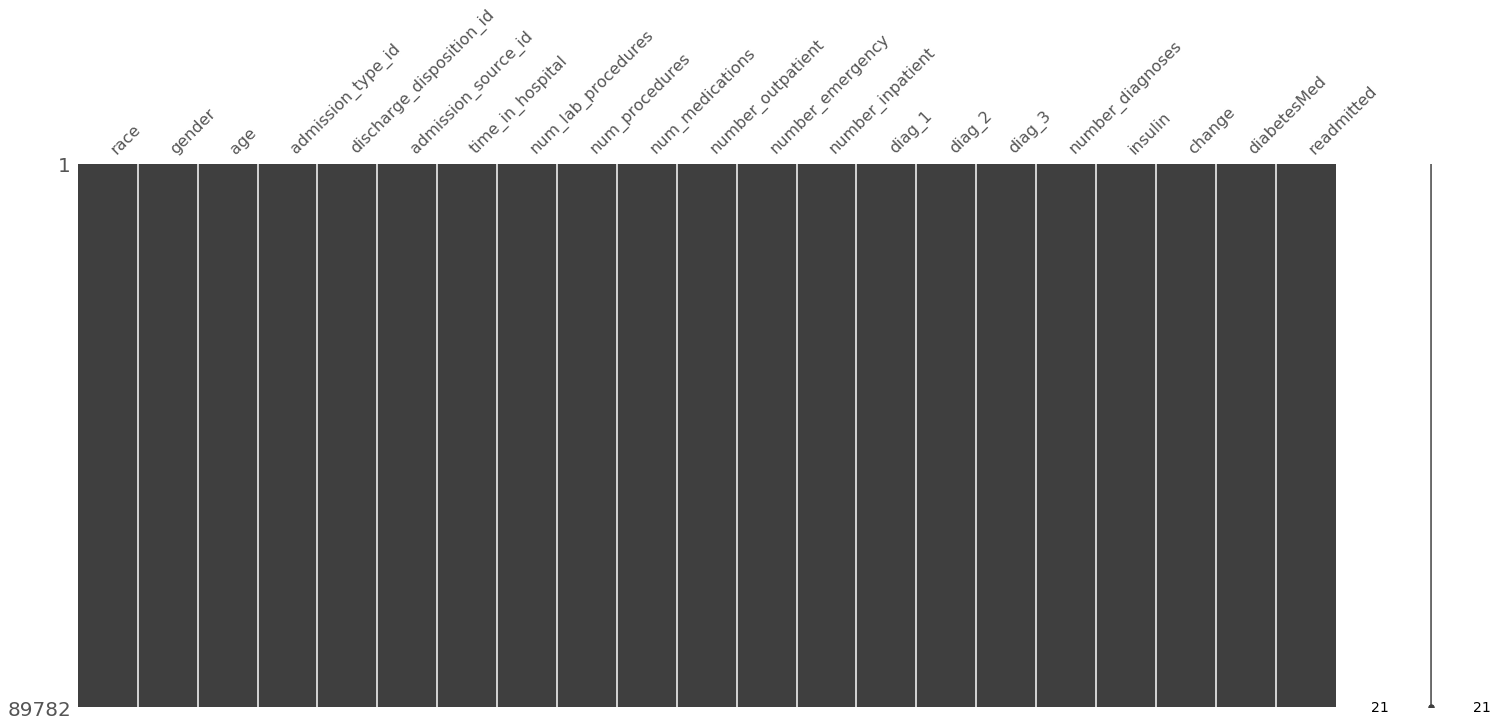

In [9]:
sub_df.dropna(inplace=True)
mn.matrix(sub_df)

In [10]:
# now that we have mostly cleaned the data, we can look at the columns left in a bit more detail

for col in list(sub_df):
    print('\n~~~~~~~~~~~~~~~~~~~~~~~~\n')
    print('now analyzing {0}\n'.format(col))
    for val, grp in sub_df.groupby(by = col):
        print('there were {0} entries in {1} group'.format(len(grp),val))


~~~~~~~~~~~~~~~~~~~~~~~~

now analyzing race

there were 17447 entries in AfricanAmerican group
there were 578 entries in Asian group
there were 68570 entries in Caucasian group
there were 1835 entries in Hispanic group
there were 1352 entries in Other group

~~~~~~~~~~~~~~~~~~~~~~~~

now analyzing gender

there were 48446 entries in Female group
there were 41335 entries in Male group
there were 1 entries in Unknown/Invalid group

~~~~~~~~~~~~~~~~~~~~~~~~

now analyzing age

there were 56 entries in [0-10) group
there were 375 entries in [10-20) group
there were 1285 entries in [20-30) group
there were 3204 entries in [30-40) group
there were 8470 entries in [40-50) group
there were 15232 entries in [50-60) group
there were 19947 entries in [60-70) group
there were 23204 entries in [70-80) group
there were 15453 entries in [80-90) group
there were 2556 entries in [90-100) group

~~~~~~~~~~~~~~~~~~~~~~~~

now analyzing admission_type_id

there were 48612 entries in 1 group
there were 1

there were 74873 entries in 0 group
there were 7569 entries in 1 group
there were 3206 entries in 2 group
there were 1832 entries in 3 group
there were 982 entries in 4 group
there were 473 entries in 5 group
there were 271 entries in 6 group
there were 137 entries in 7 group
there were 94 entries in 8 group
there were 75 entries in 9 group
there were 55 entries in 10 group
there were 38 entries in 11 group
there were 28 entries in 12 group
there were 31 entries in 13 group
there were 25 entries in 14 group
there were 20 entries in 15 group
there were 14 entries in 16 group
there were 7 entries in 17 group
there were 5 entries in 18 group
there were 3 entries in 19 group
there were 7 entries in 20 group
there were 6 entries in 21 group
there were 5 entries in 22 group
there were 2 entries in 23 group
there were 3 entries in 24 group
there were 2 entries in 25 group
there were 1 entries in 26 group
there were 3 entries in 27 group
there were 1 entries in 28 group
there were 2 entries in

there were 91 entries in 781.0 group
there were 73 entries in 782.0 group
there were 28 entries in 783.0 group
there were 133 entries in 784.0 group
there were 94 entries in 785.0 group
there were 3616 entries in 786.0 group
there were 229 entries in 787.0 group
there were 35 entries in 788.0 group
there were 519 entries in 789.0 group
there were 127 entries in 790.0 group
there were 1 entries in 791.0 group
there were 4 entries in 792.0 group
there were 3 entries in 793.0 group
there were 25 entries in 794.0 group
there were 3 entries in 795.0 group
there were 5 entries in 796.0 group
there were 3 entries in 797.0 group
there were 64 entries in 799.0 group
there were 3 entries in 800.0 group
there were 27 entries in 801.0 group
there were 26 entries in 802.0 group
there were 1 entries in 803.0 group
there were 1 entries in 804.0 group
there were 131 entries in 805.0 group
there were 5 entries in 806.0 group
there were 55 entries in 807.0 group
there were 100 entries in 808.0 group
the

there were 2 entries in 797.0 group
there were 257 entries in 799.0 group
there were 1 entries in 800.0 group
there were 2 entries in 801.0 group
there were 23 entries in 802.0 group
there were 63 entries in 805.0 group
there were 3 entries in 806.0 group
there were 35 entries in 807.0 group
there were 33 entries in 808.0 group
there were 3 entries in 810.0 group
there were 22 entries in 812.0 group
there were 18 entries in 813.0 group
there were 2 entries in 814.0 group
there were 6 entries in 816.0 group
there were 35 entries in 820.0 group
there were 13 entries in 821.0 group
there were 3 entries in 822.0 group
there were 12 entries in 823.0 group
there were 11 entries in 824.0 group
there were 6 entries in 825.0 group
there were 1 entries in 826.0 group
there were 4 entries in 831.0 group
there were 1 entries in 832.0 group
there were 1 entries in 833.0 group
there were 6 entries in 836.0 group
there were 2 entries in 837.0 group
there were 11 entries in 840.0 group
there were 1 en

there were 9 entries in 892.0 group
there were 1 entries in 893.0 group
there were 12 entries in 905.0 group
there were 4 entries in 906.0 group
there were 8 entries in 907.0 group
there were 5 entries in 908.0 group
there were 6 entries in 909.0 group
there were 3 entries in 910.0 group
there were 2 entries in 911.0 group
there were 2 entries in 912.0 group
there were 5 entries in 913.0 group
there were 4 entries in 915.0 group
there were 10 entries in 916.0 group
there were 6 entries in 917.0 group
there were 2 entries in 918.0 group
there were 2 entries in 919.0 group
there were 23 entries in 920.0 group
there were 3 entries in 921.0 group
there were 15 entries in 922.0 group
there were 17 entries in 923.0 group
there were 34 entries in 924.0 group
there were 1 entries in 928.0 group
there were 1 entries in 930.0 group
there were 3 entries in 933.0 group
there were 6 entries in 934.0 group
there were 1 entries in 935.0 group
there were 1 entries in 942.0 group
there were 2 entries i

In [11]:
# that all looked okay, except the "Unknown/Invalid" entry in the gender column, so lets just drop it (and make sure it worked)

print('size before {}'.format(sub_df.shape))
#sub_df = sub_df[sub_df.gender != "Unknown/Invalid"]
sub_df.drop(sub_df.loc[sub_df.gender=='Unknown/Invalid'].index, inplace = True)
print('size after {}'.format(sub_df.shape))

size before (89782, 21)
size after (89781, 21)


At this point I think we have sufficiently cleaned the data.

In the several cells above we cleaned the data some. First we forced all of the columsn that should be numeric to numeric data types. We did this because we noticed that several of the diag_1, diag_2, and diag_3 entries were strings such as "V27". This may be meaningful, but we were unable to find any documentation about how to interpret these results so we felt it safest to simply not have this data. Next we replaced the characters used in the data set for empty entries, such as ?, into characters python understands as empty. Next we dropped three sets of columns.

1. cols_to_drop_obvious. This is a list of the column names that we dropped because we don't feel they have much usable information at this point. This list only contained IDs.
2. cols_to_drop_missing. This list contained the column names of the attributes we dropped because we felt they were missing too much data. We also considered dropping race, but felt the predictive value it may contain outweighed the missing data in this case.
3. meds. This contaned a list of the various medications included in this dataset. While these may contain usable information, we dropped them to make the data set somewhat more tractable. We will likely do some sort of dimensionality reduction with this data later.

Finally, from the data that remained we dropped the rows where there was still missing data. We chose to drop data in all cases instead of imputing anything. We did this because we are, in general, not familiar enough with the data to safely impute anything. We also deleted data in two general categories. The first category had too much data for us to infer much about how we should impute. The second category was missing so little data that simply deleting it should not significantly change any results we get.

Most of the missing is likely because it was not orignally reported when this data was collected. However, the strings in the numeric data could be a mistake, or it could have meaning that we simply don't know.

# Data Visualization
<a id="data_visualization"></a>

## Visualize Attribute Distributions
<a id="attribute_distributions"></a>

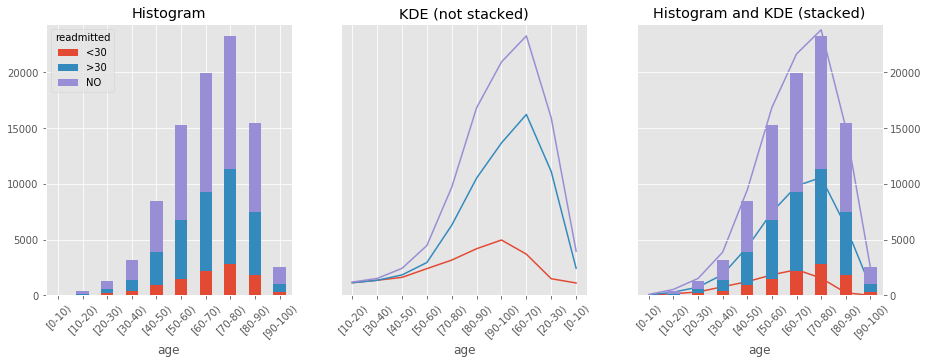

In [12]:
# to start with lets look at the people readmitted for each age group, then sort into child, adult, senior
import scipy.stats as sts
from sklearn import preprocessing
lee = preprocessing.LabelEncoder()

age_df = sub_df.groupby(['age', 'readmitted'])['age'].count().unstack('readmitted').fillna(0)

# now for a stacked kde (hopefully)
kde_dict = {}
for val, grp in sub_df.groupby(by=['readmitted']):
    grp.age = lee.fit_transform(grp.age)                # first convert to numeric
    kernel = sts.gaussian_kde(grp['age'])               # make the kernel
    kde_dict[val] = kernel(np.arange(10))*len(grp)*1.25 # evaluate the kernel at specified positions, 
                                                        # multiply by N to fix normalization
                                                        # multiply by 1.25 because idk
    
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_title('Histogram')
age_df.plot(kind='bar', stacked=True, ax = ax1, rot = 45)

ax2.set_title('KDE (not stacked)')
ax2.plot(kde_dict['<30'], label = '<30')
ax2.plot(kde_dict['>30'], label = '>30')
ax2.plot(kde_dict['NO'], label = 'NO')
ax2.set_xticks(np.arange(10))
ax2.set_xticklabels(sub_df['age'].unique())
ax2.set_yticks([])
ax2.tick_params(axis='x',rotation=45)
ax2.set_xlabel('age')

ax3.set_title('Histogram and KDE (stacked)')
ax3.plot(kde_dict['<30'])
ax3.plot(kde_dict['<30']+kde_dict['>30'], label = '>30')
ax3.plot(kde_dict['<30']+kde_dict['>30']+kde_dict['NO'], label = 'NO')
ax3.set_xticks(np.arange(10))
ax3.set_xticklabels(sub_df['age'].unique())
ax3.tick_params(axis='x',rotation=45)
ax3.set_ylim(0,60000)
ax3.set_yticks([])
age_df.plot(kind='bar', stacked=True, ax = ax3, rot = 45, secondary_y=True, legend = False)

### look at age
<a id="age"></a>

First group them into coarser categories, then histogram and find the fraction of each category in each age group to normalize to group size.

In [13]:
# can you use .cut with named keys? Or do you have to convert to numbers, then .cut?
dat_1 = age_df.loc['[0-10)':'[30-40)'].sum()
dat_2 = age_df.loc['[40-50)':'[50-60)'].sum()
dat_3 = age_df.loc['[60-70)':'[70-80)'].sum()
dat_4 = age_df.loc['[80-90)':'[90-100)'].sum()
grouped_ages = pd.concat([dat_1,dat_2,dat_3,dat_4], keys = ['[0-40)','[40-60)','[60-80)','[80-100)'],axis=1)
# and a dataframe for percentages
normalized_grouped_ages = grouped_ages/grouped_ages.sum()

In [14]:
grouped_ages.transpose()

readmitted,<30,>30,NO
[0-40),559.0,1588.0,2773.0
[40-60),2405.0,8228.0,13069.0
[60-80),4987.0,15599.0,22564.0
[80-100),2134.0,6378.0,9497.0


In [15]:
normalized_grouped_ages.transpose()

readmitted,<30,>30,NO
[0-40),0.113618,0.322764,0.563618
[40-60),0.101468,0.347144,0.551388
[60-80),0.115574,0.361506,0.522920
[80-100),0.118496,0.354156,0.527347


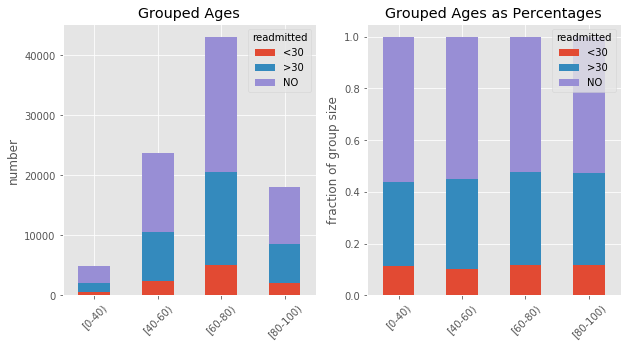

In [16]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Grouped Ages')
ax1.set_ylabel('number')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Grouped Ages as Percentages')
ax2.set_ylabel('fraction of group size')

grouped_ages.transpose().plot(kind='bar',stacked='true', ax = ax1, rot = 45) # why do I have to give ax = ax_name instead of plt.subplot...
normalized_grouped_ages.transpose().plot(kind='bar',stacked='true', ax = ax2, rot = 45)

plt.show()

It doesn't really look like age was too much of a factor in whether or not the patient was readmitted. That is somewhat surprising to me.

### now look at race
<a id="race"></a>

In [17]:
# now do the same with race, except probably don't combine races.
race_df = sub_df.groupby(['race', 'readmitted'])['race'].count().unstack('readmitted').fillna(0)
normalized_race_df = race_df.transpose()/race_df.sum(axis = 1)

race_df

readmitted,<30,>30,NO
race,,,
AfricanAmerican,1960,6049,9438
Asian,58,147,373
Caucasian,7755,24597,36218
Hispanic,189,598,1048
Other,123,402,826


In [18]:
normalized_race_df.transpose()

readmitted,<30,>30,NO
race,,,
AfricanAmerican,0.112340,0.346707,0.540953
Asian,0.100346,0.254325,0.645329
Caucasian,0.113096,0.358714,0.528190
Hispanic,0.102997,0.325886,0.571117
Other,0.091044,0.297557,0.611399


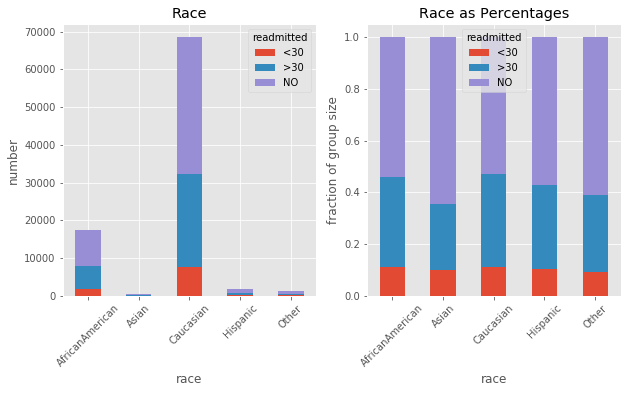

In [19]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Race')
ax1.set_ylabel('number')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Race as Percentages')
ax2.set_ylabel('fraction of group size')

race_df.plot(kind='bar', stacked='true', ax=ax1, rot=45)
normalized_race_df.transpose().plot(kind='bar',stacked='true', ax = ax2, rot=45)

plt.show()

### now gender
<a id="gender"></a>

In [20]:
# and maybe gender

gender_df = sub_df.groupby(['gender', 'readmitted'])['gender'].count().unstack('readmitted').fillna(0)
normalized_gender_df = gender_df.transpose()/gender_df.sum(axis = 1)

gender_df

readmitted,<30,>30,NO
gender,,,
Female,5460,17524,25462
Male,4625,14269,22441


In [21]:
normalized_gender_df.transpose()

readmitted,<30,>30,NO
gender,,,
Female,0.112703,0.361722,0.525575
Male,0.111891,0.345204,0.542906


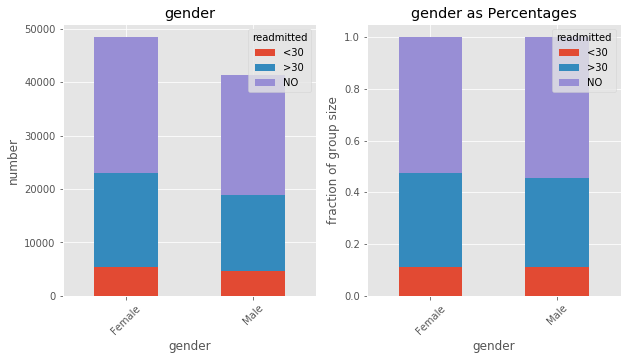

In [22]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('gender')
ax1.set_ylabel('number')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('gender as Percentages')
ax2.set_ylabel('fraction of group size')

gender_df.plot(kind='bar', stacked='true', ax=ax1, rot=45) # why do I have to give ax = ax_name instead of plt.subplot...
normalized_gender_df.transpose().plot(kind='bar',stacked='true', ax = ax2, rot=45)

plt.show()

### Look at the number of procedures
<a id="procedures"></a>

This is the first of the numeric attributes we have looked at.

We tried a variety of bandwidths to try to get a feel for how they change the kde as well

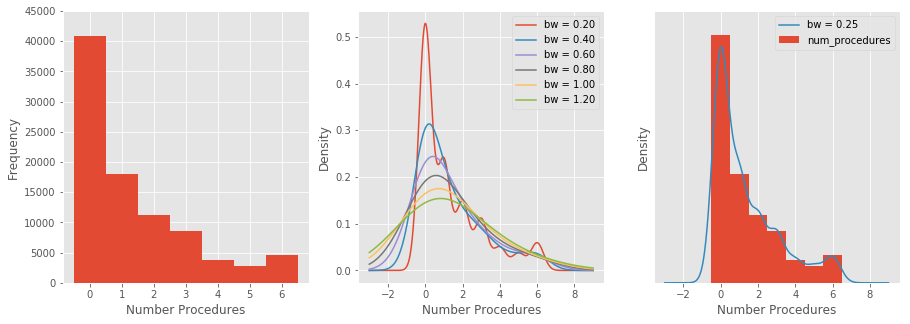

In [23]:
# a simpler look at histogramming/kde

fig = plt.figure(figsize = (15,5))
bins = (np.arange(0,max(sub_df.num_procedures)+2,1)-0.5) # shift bins so that they are centered on num_procedures

bandwidths = np.arange(0.2,1.4,0.2)
bw_pick = 0.25

plt.subplot(1,3,1)
sub_df.num_procedures.plot.hist(bins=bins)
plt.ylim(0,45000)
plt.xlabel('Number Procedures')

plt.subplot(1,3,2)
for bw in bandwidths:
    sub_df.num_procedures.plot.kde(bw_method=bw, label = 'bw = {:.2f}'.format(bw))
l = plt.legend()
plt.ylabel('Density')
plt.xlabel('Number Procedures')

plt.subplot(1,3,3)
sub_df.num_procedures.plot.hist(bins=bins, **{'normed':True})
sub_df.num_procedures.plot.kde(bw_method=bw_pick, label = 'bw = {:.2f}'.format(bw_pick))
l = plt.legend()
plt.yticks([])
plt.ylim(0,0.5)
plt.xlabel('Number Procedures')

plt.show()

### look at the number of medications
<a id="medications"></a>

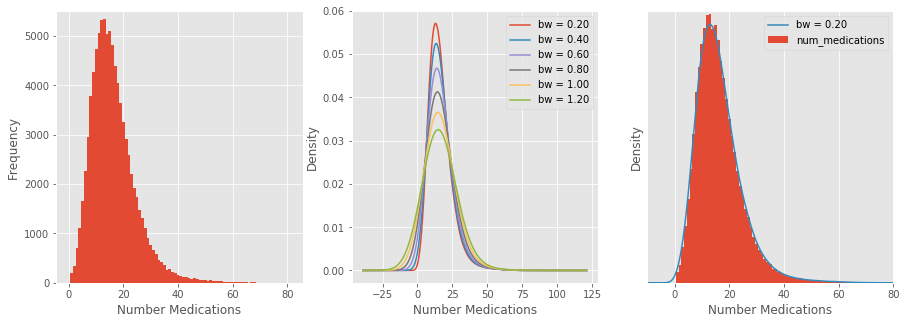

In [24]:
fig = plt.figure(figsize = (15,5))
bins = (np.arange(0,max(sub_df.num_medications)+2,1)-0.5) # shift bins so that they are centered on num_meds

bandwidths = np.arange(0.2,1.4,0.2)
bw_pick = 0.2

plt.subplot(1,3,1)
sub_df.num_medications.plot.hist(bins=bins)
plt.ylim(0,5500)
plt.xlabel('Number Medications')

plt.subplot(1,3,2)
for bw in bandwidths:
    sub_df.num_medications.plot.kde(bw_method=bw, label = 'bw = {:.2f}'.format(bw))
l = plt.legend()
plt.xlabel('Number Medications')

plt.subplot(1,3,3)
sub_df.num_medications.plot.hist(bins=bins, **{'normed':True})
sub_df.num_medications.plot.kde(bw_method=bw_pick, label = 'bw = {:.2f}'.format(bw_pick))
l = plt.legend()
plt.yticks([])
plt.ylim(0,0.06)
plt.xlim(-10,80)
plt.xlabel('Number Medications')

plt.show()

## Visualize relationships between a subset of attributes
<a id="visualize_relationships"></a>

### Violin Plot
<a id="violin"></a>

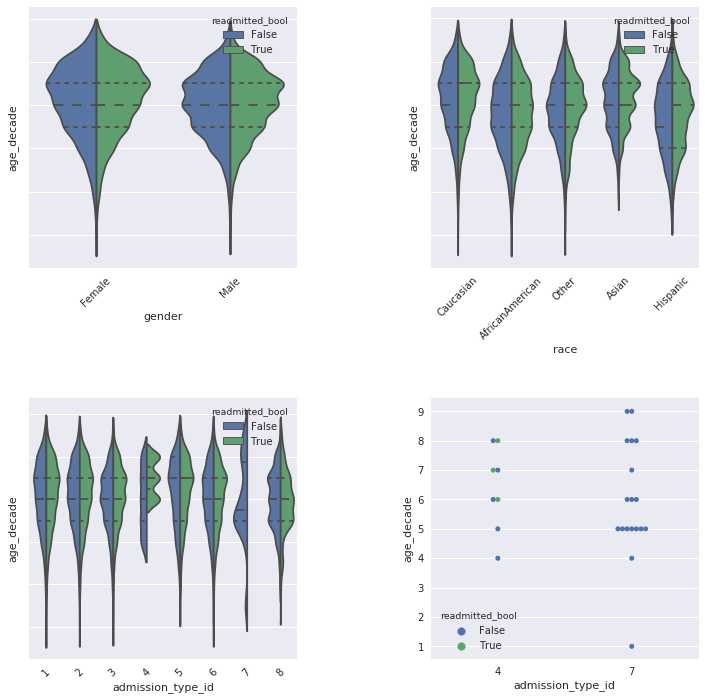

In [63]:
# map readmitted to boolean
import seaborn as sns

# make a violin plot
sub_df['readmitted_bool'] = sub_df['readmitted'].replace({'<30':True, '>30':True, 'NO':False})
sub_df['age_decade'] = sub_df['age'].replace({'[0-10)':0,'[10-20)':1,'[20-30)':2,'[30-40)':3,'[40-50)':4,
                                         '[50-60)':5,'[60-70)':6,'[70-80)':7,'[80-90)':8,'[90-100)':9})


fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

g = sns.violinplot(x="gender", y="age_decade", hue="readmitted_bool", data = sub_df, 
               split=True, inner="quart", bw = 0.3, ax=ax1)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

g = sns.violinplot(x="race", y="age_decade", hue="readmitted_bool", data = sub_df, 
               split=True, inner="quart", bw = 0.3, ax=ax2)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

g = sns.violinplot(x="admission_type_id", y="age_decade", hue="readmitted_bool", data = sub_df, 
               split=True, inner="quart", bw = 0.3, ax=ax3)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

ids = [4,7]
dat = sub_df[sub_df['admission_type_id'].isin(ids)]
sns.swarmplot(x="admission_type_id", y="age_decade", hue="readmitted_bool", 
              data=sub_df[sub_df['admission_type_id'].isin(ids)] , ax=ax4)

fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

There are a few things to notice from the plot. First, there does not seem to be much difference between the categories. As we move further into this project it is becoming clear why previous studies using this data set have had such a hard time predicting outcomes. The right most set of violin plots appears to show some difference if admission_type_id is 4, or 7. However, we cannot tell how many data points are displayed in those subsets. To get that information we can use a swarm plot. Since there are not very many data points in those specific subsets, it is difficult to make any conclusions from those pieces. We could have also just scrolled up in the notebook to where we output the numbers of people in each subset.

### Correlation Plot
<a id="correlation"></a>

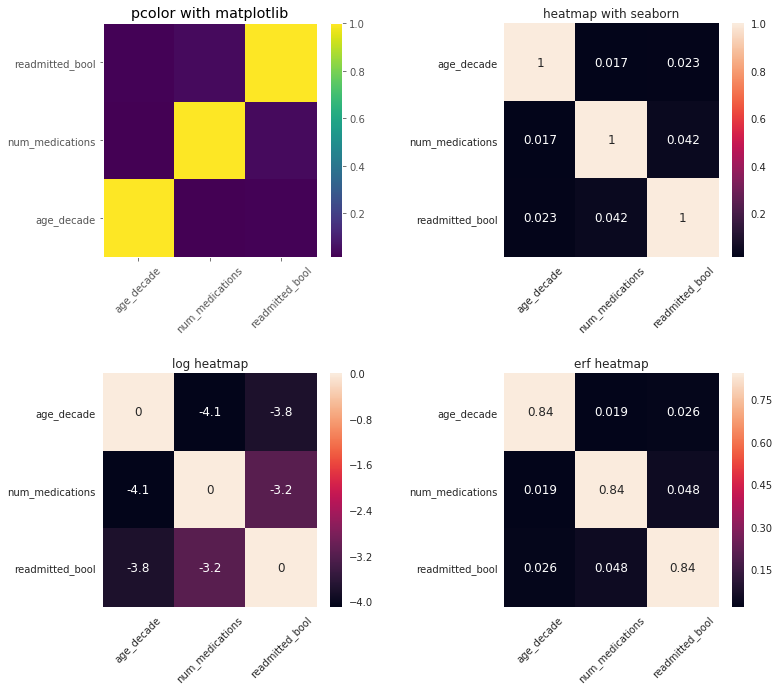

In [26]:
# look at correlation matrix?
# plot the correlation matrix 
from scipy.special import erf

vars_to_use = ['age_decade', 'num_medications', 'readmitted_bool'] # pick vars

vals = sub_df[vars_to_use].corr()
log_vals = np.log(vals) # is .apply(erf) significantly faster on larger datasets?
erf_vals = erf(vals)

fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(2,2,1)
ax.set_title('pcolor with matplotlib')
im = ax.pcolor(vals) # do the feature correlation plot
# fill in the indices
ax.set_yticks(np.arange(0.5, len(vars_to_use), 1))
ax.set_yticklabels(vars_to_use)
ax.set_xticks(np.arange(0.5, len(vars_to_use), 1))
ax.set_xticklabels(vars_to_use, rotation = 45)
plt.colorbar(im, ax=ax)

cmap = sns.set(style="darkgrid") # one of the many styles to plot using
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('heatmap with seaborn')
g = sns.heatmap(vals, annot=True, ax=ax2)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('log heatmap')
g = sns.heatmap(log_vals, annot=True, ax=ax3)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('erf heatmap')
g = sns.heatmap(erf_vals, annot=True, ax=ax4)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

fig.subplots_adjust(top=0.8, wspace=0.5, hspace=0.5)

plt.show()

After all of the previous work it is not surprising that there is not much correlation here. From a technical perspective, both interfaces (seaborn and matplotlib) generate similar looking plots with the exception of the annotation included in seaborn.

There does start to be some separation if we plot the logarithm of the correlation. This transform should emphasize the small correlations instead of being dominated by the 1s along the main diagonal.

We also try the error function, but it doesn't provides worse separation than taking the logarithm.

### Pairwise Distances
<a id="pairwise"></a>

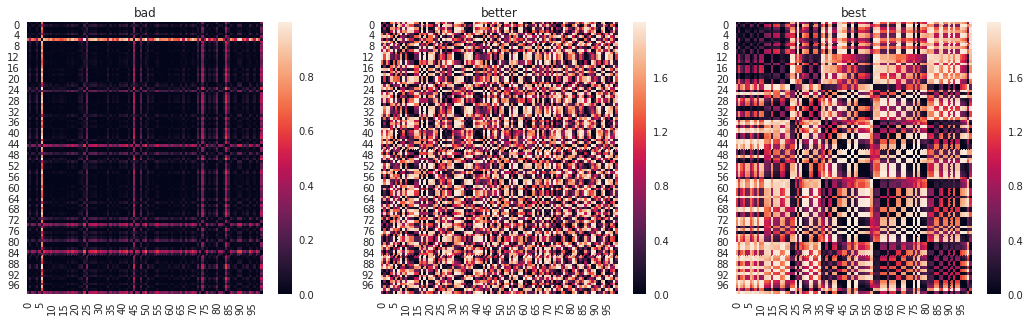

In [27]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

sub_df_copy = sub_df[vars_to_use].sample(n=100, random_state = 0)

# for un-normalized data
xdata_bad = pairwise_distances(sub_df_copy.values, metric='correlation')

# for normalized data
xdata_normed = pairwise_distances(std.fit_transform(sub_df_copy.values), metric='correlation')

# now sorted
xdata_sorted = pairwise_distances(std.fit_transform(sub_df_copy.sort_values(by=['age_decade','num_medications','readmitted_bool'])),
                            metric='correlation')


fig = plt.figure(figsize = (18,5))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title('bad')
sns.heatmap(xdata_bad, cmap=cmap, annot=False, ax=ax1)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('better')
sns.heatmap(xdata_normed, cmap=cmap, annot=False, ax=ax2)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('best')
sns.heatmap(xdata_sorted, cmap=cmap, annot=False, ax=ax3)

plt.show()

Above we show three separate pairwise distance plots

1. In the first plot we simply use the pairwise_distances function included in sklearn. This distance is dominated by the number of medications because it uses much larger numbers than the other attributes included here.
2. In the second plot we normalize each attribute before calling the pairwise distance plots. This is better because it means that each attribute has equal "weight" when calculating the pairwise distance
3. Finally, in the third plot we sort the dataframe by age, then number of medications, then by readmission before the calculations. In this we can start to see groups start to form as blocks inside the heatmap.

# Exceptional Work
<a id="exceptional_work"></a>

## Dimensional Reduction
<a id="dim_reduction"></a>

In [28]:
from sklearn import manifold
from sklearn.decomposition import PCA
tsne_df = sub_df.copy(deep=True)

numeric_cols = ['diag_1', 'diag_2', 'diag_3']
tsne_df[numeric_cols] = tsne_df[numeric_cols].apply(pd.to_numeric,errors='coerce')

tsne_df.replace({'?':None,'None':None},inplace=True)

tsne_df['change'] = tsne_df['change'].replace({'No':0,'Ch':1})
tsne_df['insulin'] = tsne_df['insulin'].replace({'No':0,'Up':3,'Down':1,'Steady':2})
tsne_df['readmitted'] = tsne_df['readmitted'].replace({'NO':0,'>30':1,'<30':2})
tsne_df['diabetesMed'] = tsne_df['diabetesMed'].replace({'No':0,'Yes':1})
tsne_df['age'] = tsne_df['age'].replace({'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,
                                         '[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95})
tsne_df['gender'] = tsne_df['gender'].replace({'Female':0,'Male':1,'Unknown/Invalid':None})
tsne_df['race'] = tsne_df['race'].replace({'AfricanAmerican':0,'Asian':1,'Caucasian':2,'Hispanic':3,'Other':4})
tsne_df.dropna(inplace=True) # shouldn't need to do this again!

In [29]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89781 entries, 1 to 101765
Data columns (total 23 columns):
race                        89781 non-null int64
gender                      89781 non-null int64
age                         89781 non-null int64
admission_type_id           89781 non-null int64
discharge_disposition_id    89781 non-null int64
admission_source_id         89781 non-null int64
time_in_hospital            89781 non-null int64
num_lab_procedures          89781 non-null int64
num_procedures              89781 non-null int64
num_medications             89781 non-null int64
number_outpatient           89781 non-null int64
number_emergency            89781 non-null int64
number_inpatient            89781 non-null int64
diag_1                      89781 non-null float64
diag_2                      89781 non-null float64
diag_3                      89781 non-null float64
number_diagnoses            89781 non-null int64
insulin                     89781 non-null int64
ch

In [30]:
sample_size = 1000
tsne_df = tsne_df.sample(frac=1).reset_index(drop=True)
X, y = tsne_df[tsne_df.columns[0:-1]], tsne_df[tsne_df.columns[-1:]]
X = X.head(sample_size)
y = y.head(sample_size)
y = y.values

In [31]:
n_samples, n_features = X.shape
print(X.shape)

(1000, 22)


t-SNE model built!
Orginal data dimension is 22. Embedded data dimension is 2


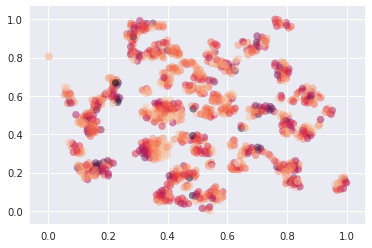

In [32]:
'''t-SNE'''

tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,verbose=0)
print('t-SNE model built!')

X_tsne = tsne.fit_transform(X)
print("Orginal data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

colors = (np.transpose(y)[0]/3+0.1)

x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)

plt.scatter(np.transpose(X_norm)[0], np.transpose(X_norm)[1], c=colors, alpha=0.5)

### t-SNE explained:
<a id="tsne"></a>
The attributes of data points can be used to predict the result. Notice that if two data points are close enough, then they tend to lead to the same result, which indicates what seperates two data points is the distance between them. Thus, the distances of all pairs of data points will preserve same amount of information as the attributes of the data.
Ideally, if we can project the high dimention data into lower dimention with all distances between any pairs of data points unchange, then no information is lost. However, this is no possible. Hence we need a loss function to show the loss of information by measuring the change of distances. And by minimamize the loss function, we get the best dimension reducting projection.

SNE method uses unsymetric distance (d_i,j != d_j,i). The imporved t-SNE method use symetric distance, thus reduces the time complexicity by a ratio of 2? Also for the reduced distance, SNE uses Gaussian kernal, and t-SNE uses student t-distribution, which has a longer tail, and thus the spread of data points projected to the lower dimension is larger (which can allows the seperation to be larger). Since the two distances are different, we set d_i,i = 0 manully to avoid conflict.
Since we need to adjust the projection matrix, we need to re-eveluate the new distance every iteration, the time complexicity of each iteration is O(n^2), which is much longer than PCA method. Iteration is done by gradient descent method.

PCA model built!
Orginal data dimension is 22. Embedded data dimension is 2


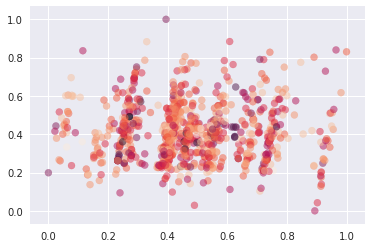

In [33]:
'''PCA'''

PCA = PCA(n_components=2, random_state=501)
print('PCA model built!')

X_PCA = PCA.fit_transform(X)
print("Orginal data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_PCA.shape[-1]))

colors = (np.transpose(y)[0]/3+0.1)

x_min, x_max = X_PCA.min(0), X_PCA.max(0)
X_norm = (X_PCA - x_min) / (x_max - x_min)

plt.scatter(np.transpose(X_norm)[0], np.transpose(X_norm)[1], c=colors, alpha=0.5)

### PCA explained
<a id="pca"></a>

In [34]:
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 30.0,
 'random_state': 501,
 'verbose': 0}

In [35]:
run_this_cell = False

if run_this_cell:
    print('running...')
    cnt = 1
    for val,grp in tsne_df.groupby(['race','admission_type_id','discharge_disposition_id','admission_source_id']):
        sample_size = 1000
        grp = grp.drop(columns=['race','admission_type_id','discharge_disposition_id','admission_source_id'])
        X, y = grp[grp.columns[0:-1]], grp[grp.columns[-1:]]
    #    X = X.head(sample_size)
    #    y = y.head(sample_size)
        y = y.values
        n_samples, n_features = X.shape
        tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,verbose=0)
        print('t-SNE model built!')

        X_tsne = tsne.fit_transform(X)
        print("Orginal data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

        colors = (np.transpose(y)[0]/3+0.1)

        x_min, x_max = X_tsne.min(0), X_tsne.max(0)
        X_norm = (X_tsne - x_min) / (x_max - x_min)
        plt.subplot(31, 31, cnt)
        plt.scatter(np.transpose(X_norm)[0], np.transpose(X_norm)[1], c=colors, alpha=0.5)
        cnt += 1
        print('Fig {} ploted!'.format(cnt))

## scikit-learn practice 
<a id="scikit_learn"></a>

This is included mostly as practice using the skikit-learn api and general workflow. So far the basic idea is to
1. Use preporcessing.LabelEncoder to convert any labels to numerics.  
2. Split the data frame into the data containing the features, and the target containing what we want to predict.  
3. Use train_test_split to split the data into training and testing sub groups. There are likely other ways to do this as well.  
4. Build/train the model.  
    4.1 instantiate the model object. ie gnb_model = GaussianNB(...)  
    4.2 train the model using the .fit method. ie gnb_model.fit(data_train, target_train)  
    4.3 finally, predict using the test data. ie .predict(data_test)  
5. See how well the model did, in this case using accuracy score  

I also timed the models we used to get a general idea for how long they take. I could have also use the timing magic commands.

In [36]:
# And now we play with scikit-learn to practice with the api some

# look at the data we have left
scikit_df = sub_df.copy(deep=True) # probably a bad idea to copy a dataframe,  but this way we preserve what we have already done
scikit_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted,readmitted_bool,age_decade
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,276.0,250.01,255.0,9,Up,Ch,Yes,>30,True,1
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,8.0,250.43,403.0,7,Up,Ch,Yes,NO,False,3
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,197.0,157.00,250.0,5,Steady,Ch,Yes,NO,False,4
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,414.0,411.00,250.0,9,Steady,No,Yes,>30,True,5
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,...,428.0,492.00,250.0,8,No,No,Yes,>30,True,7


In [37]:
# convert labels to numerics

from sklearn import preprocessing

lee = preprocessing.LabelEncoder()

scikit_df.race = lee.fit_transform(scikit_df.race)
scikit_df.gender = lee.fit_transform(scikit_df.gender)
scikit_df.age = lee.fit_transform(scikit_df.age)  # for now use the original ages in decades, maybe we should be smarter with this encoding
scikit_df.insulin = lee.fit_transform(scikit_df.insulin)
scikit_df.change = lee.fit_transform(scikit_df.change)
scikit_df.diabetesMed = lee.fit_transform(scikit_df.diabetesMed)
scikit_df.readmitted = lee.fit_transform(scikit_df.readmitted)

# so much repeated code ...
scikit_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted,readmitted_bool,age_decade
1,2,0,1,1,1,7,3,59,0,18,...,276.0,250.01,255.0,9,3,0,1,1,True,1
3,2,1,3,1,1,7,2,44,1,16,...,8.0,250.43,403.0,7,3,0,1,2,False,3
4,2,1,4,1,1,7,1,51,0,8,...,197.0,157.00,250.0,5,2,0,1,2,False,4
5,2,1,5,2,1,2,3,31,6,16,...,414.0,411.00,250.0,9,2,1,1,1,True,5
7,2,1,7,1,1,7,5,73,0,12,...,428.0,492.00,250.0,8,1,1,1,1,True,7


In [38]:
# now separate features and target

features = [col for col in scikit_df.columns if col not in ['readmitted', 'readmitted_bool']]

data = scikit_df[features]
target = scikit_df['readmitted']

data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,age_decade
1,2,0,1,1,1,7,3,59,0,18,...,0,0,276.0,250.01,255.0,9,3,0,1,1
3,2,1,3,1,1,7,2,44,1,16,...,0,0,8.0,250.43,403.0,7,3,0,1,3
4,2,1,4,1,1,7,1,51,0,8,...,0,0,197.0,157.00,250.0,5,2,0,1,4
5,2,1,5,2,1,2,3,31,6,16,...,0,0,414.0,411.00,250.0,9,2,1,1,5
7,2,1,7,1,1,7,5,73,0,12,...,0,0,428.0,492.00,250.0,8,1,1,1,7


In [39]:
# now split training and testing data
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.30, random_state = 10)

In [40]:
# use Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

t_start = time.time()
gnb_model = GaussianNB(priors=None)

# train the algorithm and precidt using the testing data
pred_gnb = gnb_model.fit(data_train, target_train).predict(data_test)

t_stop = time.time()
print('Naive-Bayes accuracy : {0:.3f}, which took {1:.3f} seconds'.format(accuracy_score(target_test, pred_gnb, normalize=True),
                                                                         t_stop-t_start))

Naive-Bayes accuracy : 0.554, which took 0.027 seconds


In [41]:
# now try linearSVC aka Linear Support Vector Classification, a subclass of SVM Support Vector Machine
from sklearn.svm import LinearSVC

t_start = time.time()
svc_model = LinearSVC(random_state=0)

# train and predict as usual
pred_svc = svc_model.fit(data_train, target_train).predict(data_test)

t_stop = time.time()
print('LinearSVC accuracy : {0:.3f}, which took {1:.3f} seconds'.format(accuracy_score(target_test, pred_svc, normalize=True),
                                                                        t_stop-t_start))

LinearSVC accuracy : 0.536, which took 23.006 seconds


In [42]:
# now try K neighbors
from sklearn.neighbors import KNeighborsClassifier

t_start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=3)

pred_knn = knn_model.fit(data_train, target_train).predict(data_test)

t_stop = time.time()
print('KNeighbors accuracy : {0:.3f}, which took {1:.3f} seconds'.format(accuracy_score(target_test, pred_knn, normalize=True),
                                                                        t_stop-t_start))

KNeighbors accuracy : 0.445, which took 0.876 seconds


## Final Thoughts
<a id="thoughts"></a>
After analyzing this dataset a few things are noticible.

1. First, predicting medical outcomes is hard. Many groups have tried in the past with varying results. Projects using our specific dataset tend to have accuracies of around 50-60 percent, which is consistent with the bare minimum sklearn models we build in the previous section. A more comprehensive look at the previous works would likely benefit us.

2. The possibilities for data visualization are almost limitless. The problem is figuring out what visualization is most appropriate for your audience. In physics we really like histograms, but other areas likely have their favorite methods. Also, seaborn makes pretty plots.